In [376]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance
from scipy import spatial

gc.enable()

video_start = '20190501'#'20190327'#'20181220' #YYYYMMDD
video_end = '20190501'#'20190327'#'20181220' #YYYYMMDD
data_path = '/data/'
sensor_list = ["acc_w","wifi"]#["gyro","acc2","acc_w","wifi","magnetic"]

temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

2019/05/01
2019/05/01


In [377]:
root = "env/"

In [378]:
envs = os.listdir(root)
envs = envs[0:len(envs)-1]
envs = [int(x) for x in envs]
envs.sort()

print "Please select a testing environment from the following environments list:"

for i in envs:
    print "Environment: (",i,")"
    
test_env = raw_input("Testing environment ")

test_env = int(test_env)

Please select a testing environment from the following environments list:
Environment: ( 5 )
Environment: ( 6 )
Environment: ( 8 )
Environment: ( 9 )
Environment: ( 10 )
Testing environment 5


In [379]:
envs.remove(test_env)
train_env=envs

In [380]:
train_env

[6, 8, 9, 10]

In [381]:
train_root = root + str(test_env) + "/dat/" + "train_dat/"
test_root = root + str(test_env) + "/dat/" + "test_dat/" 

In [382]:
motif_representatives = pd.read_csv("env/" + str(test_env) + "/dat/train_dat/" + "motif_representatives", header=None)

In [383]:
acc = pd.read_csv("env/" + str(test_env) + "/dat/" + "acc")
location_list = pd.read_csv("env/" + str(test_env) + "/dat/" + "labels") #place_clusters:wifi clustering, labels:handmade labels
acc.drop(["Unnamed: 0"], axis=1,inplace=True)
location_list.drop(["Unnamed: 0"], axis=1,inplace=True)

In [384]:
motif_representatives

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.0,13.945211,6.110725,3.774511,6.583054,16.574823,20.852363,17.766049,11.162126,4.273037,...,18.018107,11.560307,5.643638,6.735237,6.616399,6.614032,5.104793,4.206686,1.755532,-0.101125
1,2.0,21.293904,13.478089,2.428152,1.633034,4.636507,12.009997,25.077120,18.942911,12.534361,...,20.724130,18.769251,14.317674,6.190434,4.568585,7.811087,18.663995,20.390608,16.965274,9.681559
2,3.0,13.845131,8.515959,6.545038,12.150612,20.211339,18.877240,11.526484,6.967860,6.868673,...,18.890817,18.211144,12.030494,8.339707,8.247840,15.166615,19.563279,16.513888,10.297037,8.624770
3,4.0,19.273983,13.750491,8.334104,4.047105,13.852946,24.286676,20.848003,12.154962,4.832248,...,20.690265,19.766166,14.715080,7.907890,6.378770,13.125205,21.465467,19.682145,14.460039,7.827050
4,5.0,10.850201,6.669771,0.897422,14.675660,26.228727,17.276557,13.321983,3.744781,12.313641,...,9.610921,5.436561,12.874272,21.783475,19.119170,11.996458,6.220562,5.641074,15.401699,23.667753
5,6.0,7.541563,4.677131,15.830608,24.379524,17.969401,7.418181,3.350453,13.575006,24.503773,...,8.727572,21.871266,20.474771,12.729004,5.471074,2.808053,14.191615,22.154343,18.971083,12.611499
6,7.0,5.057411,7.931349,21.259262,21.058215,11.346902,4.478969,5.768876,19.200073,24.140486,...,1.945121,14.819639,23.845673,17.854792,8.850701,1.319737,8.972075,22.237444,20.432386,13.179310
7,8.0,25.022612,16.623340,10.879064,0.781534,8.187809,25.576759,22.088763,13.914551,5.960564,...,6.778622,6.995846,20.152207,21.772737,14.892971,8.659431,4.974146,11.724892,23.723015,20.701360
8,9.0,14.814229,5.418750,8.688734,21.947683,20.576957,13.106131,2.960339,9.657389,22.698071,...,6.127190,11.007477,21.141570,18.470673,11.257541,6.471410,9.384143,20.185335,19.792975,14.173563
9,10.0,-7.616681,-6.450056,-3.301178,-0.038427,1.850688,2.928282,2.951416,0.640009,-2.100409,...,-5.346392,-11.551336,-11.523612,-6.845547,-0.972072,-0.008030,-0.004493,-1.494129,-7.683400,-12.205076


In [385]:
len(location_list)

5001

In [386]:
len(acc)

5001

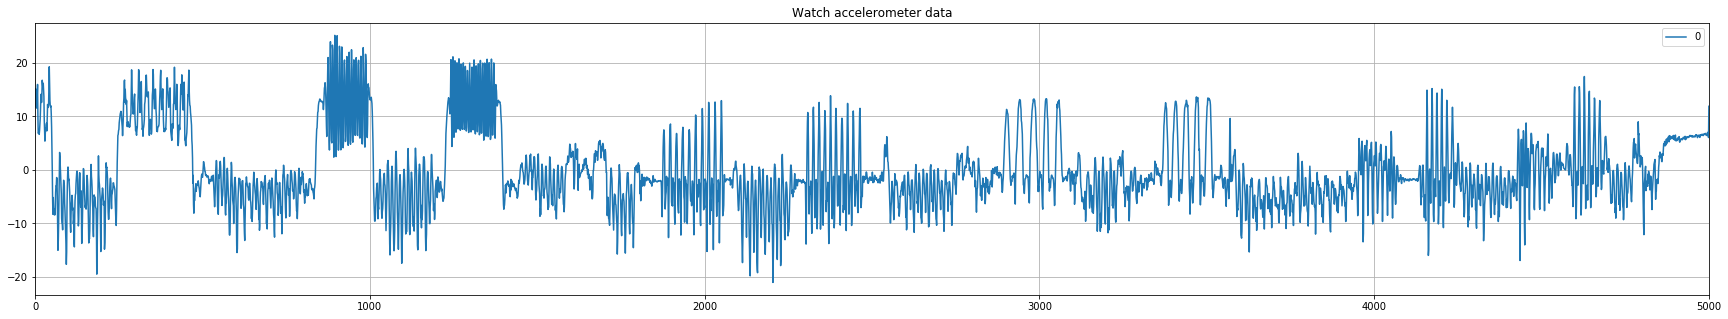

In [387]:
acc.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)])

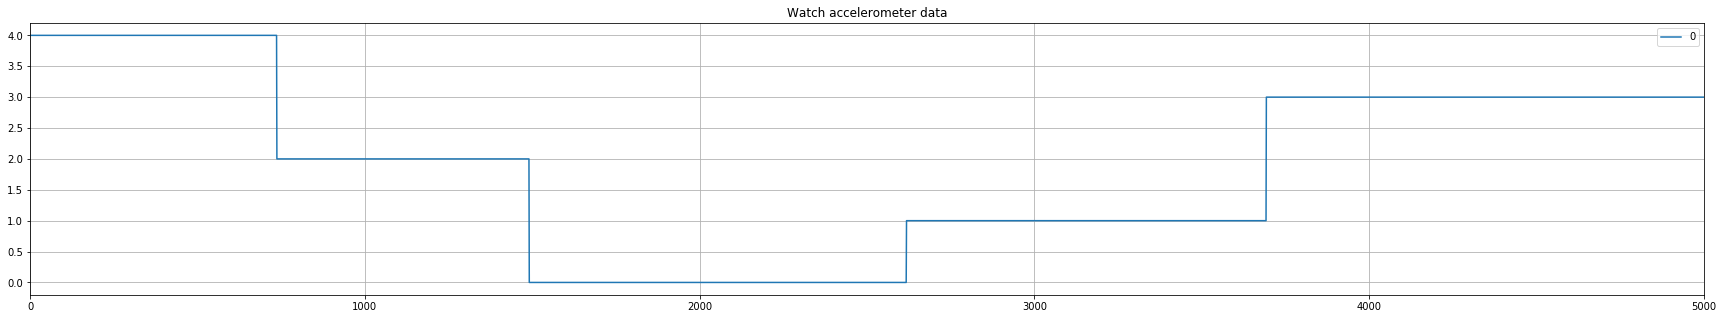

In [388]:
location_list.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(location_list)])

In [389]:
motif_representatives.index = motif_representatives[0]

In [390]:
ids = motif_representatives.index
ids = ids.astype(int)

In [391]:
motif_representatives.drop([0], axis=1,inplace=True)

# Calculate the distance between each motif representative and the acceleration data

In [392]:
from cdtw import pydtw 
discovered_motifs = []
window_size = len(motif_representatives.values[0])
disc_mot_list = [] 
dist = []

for rep in tqdm(motif_representatives.values):
    dist_row = []
    for z in range(0,len(acc)):

        candid = acc[z-window_size/2:z+window_size/2].values.reshape(-1)
        
        if z<window_size/2:
            candid = acc[0:z+window_size/2].values.reshape(-1)
            
        if z>len(acc)-window_size/2:
            candid = acc[z-window_size/2:len(acc)].values.reshape(-1)

        x = rep.tolist()
        y = candid
        #print len(candid)
        #euclidean_norm = lambda x, y: np.abs(x - y)
        #d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
        #d = dtw.distance_fast(s1, s2)
        d = pydtw.dtw(x,y).get_dist()
        dist_row.extend([d])
        
    dist.append(dist_row)
    #print dist
    #break

100%|██████████| 77/77 [01:57<00:00,  1.54s/it]


In [393]:
len(dist[0])

5001

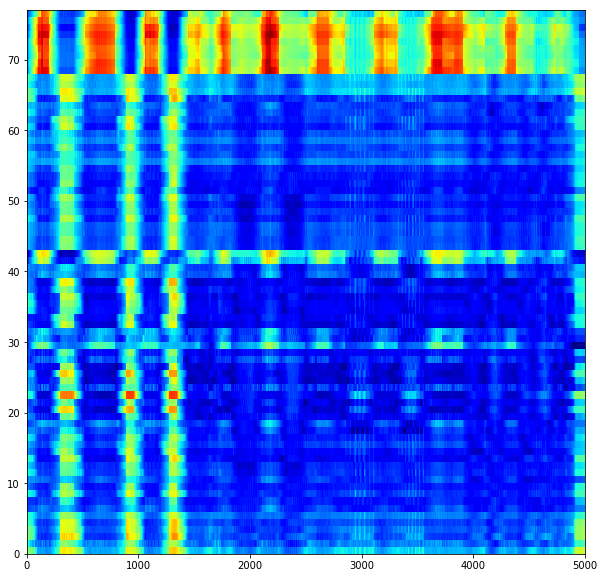

In [394]:
plt.figure(figsize=(10,10))
plt.imshow(dist, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(dist[0]),0,len(motif_representatives.values)], aspect='auto')

In [395]:
norm_dist = []
for rows in dist:
    norm_dist.append(rows/np.array(rows).max())

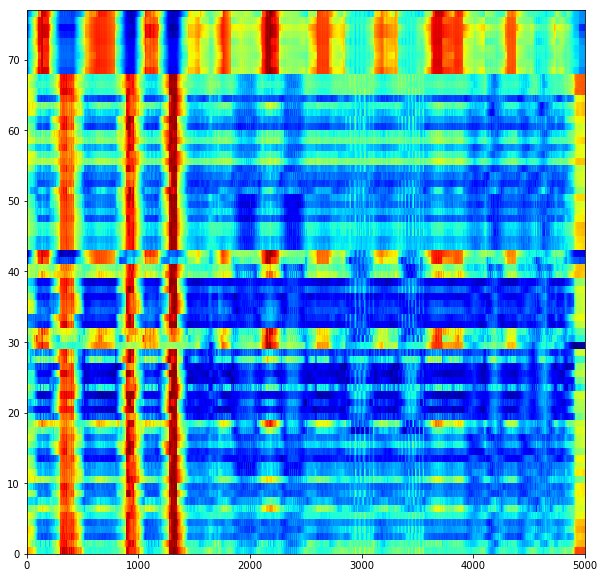

In [396]:
plt.figure(figsize=(10,10))
plt.imshow(norm_dist, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(dist[0]),0,len(motif_representatives.values)], aspect='auto')

In [397]:
disc_mot = []
for rows in norm_dist:
    disc_mot_row = []
    for elements in rows:
        if elements < 0.15:
            disc_mot_row.extend([1])
        else:
            disc_mot_row.extend([0])
    disc_mot.append(disc_mot_row)

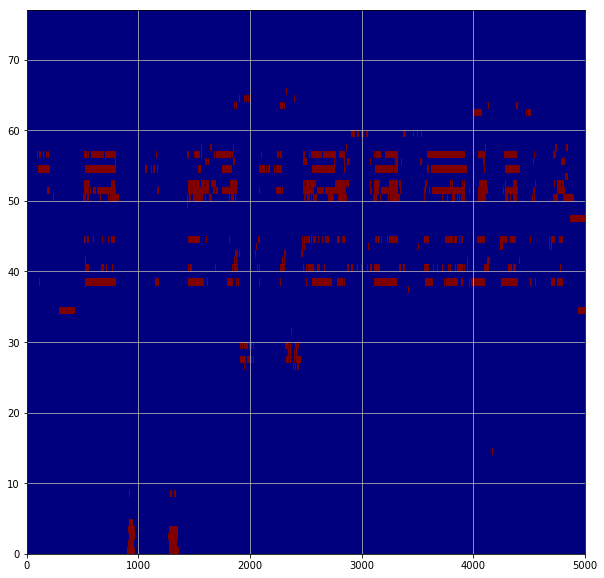

In [432]:
plt.figure(figsize=(10,10))
plt.grid()
plt.imshow(disc_mot, cmap='jet', interpolation='nearest', origin='lower', extent=[0,len(dist[0]),0,len(motif_representatives.values)], aspect='auto')

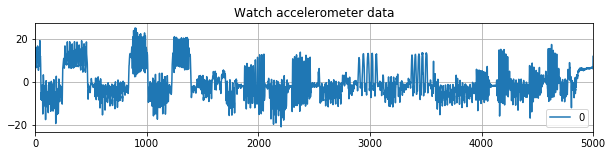

In [399]:
acc.plot(figsize = (10,2),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)])

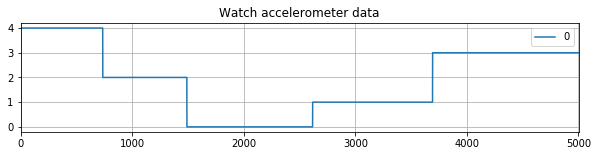

In [400]:
location_list.plot(figsize = (10,2),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)])

In [401]:
location_list

,0
0,4
1,4
2,4
3,4
4,4
5,4
6,4
7,4
8,4
9,4


set([0, 1, 2, 3, 4])


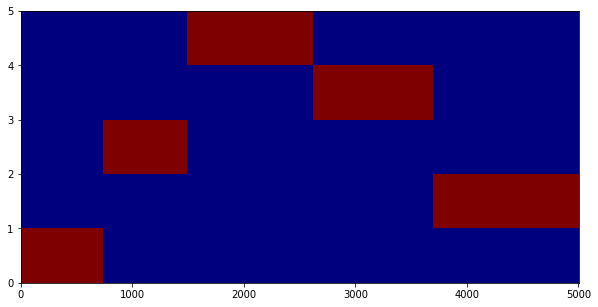

In [402]:
place_cluster = location_list

place_cluster = place_cluster.values.reshape(-1).tolist()
places = set(place_cluster)

place = []
for p in places:
    loc = []
    for c in place_cluster:
        if p == c:
            loc.append(1)
        else:
            loc.append(0)
    place.append(loc)
            

print places

plt.figure(figsize=(10,5))
plt.imshow(place,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(location_list),0,len(place)], aspect='auto')
plt.show()

In [403]:
places

{0, 1, 2, 3, 4}

In [404]:
feat = []
mot_sum = 0
for location in range(0,len(place)):
    for row in range(0,len(disc_mot)):
        count = 0
        for element in range(0,len(place[location])):
            if place[location][element] == 1:
                if disc_mot[row][element] == 1:
                    count = count+1
        feat.append([location,row,count])

In [405]:
feat

[[0, 0, 0],
 [0, 1, 0],
 [0, 2, 0],
 [0, 3, 0],
 [0, 4, 0],
 [0, 5, 0],
 [0, 6, 0],
 [0, 7, 0],
 [0, 8, 0],
 [0, 9, 0],
 [0, 10, 0],
 [0, 11, 0],
 [0, 12, 0],
 [0, 13, 0],
 [0, 14, 0],
 [0, 15, 0],
 [0, 16, 0],
 [0, 17, 0],
 [0, 18, 0],
 [0, 19, 0],
 [0, 20, 0],
 [0, 21, 0],
 [0, 22, 0],
 [0, 23, 0],
 [0, 24, 0],
 [0, 25, 0],
 [0, 26, 57],
 [0, 27, 163],
 [0, 28, 24],
 [0, 29, 150],
 [0, 30, 1],
 [0, 31, 22],
 [0, 32, 0],
 [0, 33, 0],
 [0, 34, 0],
 [0, 35, 0],
 [0, 36, 0],
 [0, 37, 0],
 [0, 38, 263],
 [0, 39, 0],
 [0, 40, 213],
 [0, 41, 40],
 [0, 42, 77],
 [0, 43, 25],
 [0, 44, 164],
 [0, 45, 0],
 [0, 46, 0],
 [0, 47, 0],
 [0, 48, 0],
 [0, 49, 0],
 [0, 50, 255],
 [0, 51, 480],
 [0, 52, 336],
 [0, 53, 0],
 [0, 54, 331],
 [0, 55, 90],
 [0, 56, 364],
 [0, 57, 35],
 [0, 58, 0],
 [0, 59, 10],
 [0, 60, 0],
 [0, 61, 0],
 [0, 62, 0],
 [0, 63, 62],
 [0, 64, 51],
 [0, 65, 13],
 [0, 66, 0],
 [0, 67, 0],
 [0, 68, 0],
 [0, 69, 0],
 [0, 70, 0],
 [0, 71, 0],
 [0, 72, 0],
 [0, 73, 0],
 [0, 74, 0],
 [0

In [406]:
feature_list = []
for f in feat:

    feature_list.append([f[0],f[1],float(f[2])])
#feature_list.append(ft)

In [407]:
feature_list = pd.DataFrame(feature_list)

#feature_list.to_csv(test_root + "features", header=False, index=False)

In [408]:
feature_list

,0,1,2
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
5,0,5,0.0
6,0,6,0.0
7,0,7,0.0
8,0,8,0.0
9,0,9,0.0


In [409]:
env_wise_sum = []

#### This is for dividing the environment-wise occurrences by environment-wise number of all occurrences
#for locs in set(feature_list[0]):
#    print locs
#    print feature_list[feature_list[0]==locs][2].sum()
#    env_wise_sum.append([locs,feature_list[feature_list[0]==locs][2].sum()])

### This is for dividing the environment-wise occurrences by the length of the environment
unique,counts = np.unique(location_list.values,return_counts=True)
env_wise_sum = np.stack([unique,counts], axis = 1)

print env_wise_sum

test = []
for sums in env_wise_sum:
    test.append(list(feature_list[feature_list[0]==sums[0]][2]/sums[1]))

print len(test[0])
feature_list['3'] = np.array(test).reshape(-1)

feature_list.drop(feature_list.columns[2], axis=1, inplace=True)

[[   0 1127]
 [   1 1075]
 [   2  754]
 [   3 1308]
 [   4  737]]
77


In [410]:
feature_list

,0,1,3
0,0,0,0.000000
1,0,1,0.000000
2,0,2,0.000000
3,0,3,0.000000
4,0,4,0.000000
5,0,5,0.000000
6,0,6,0.000000
7,0,7,0.000000
8,0,8,0.000000
9,0,9,0.000000


In [411]:
loc_wise_ft = []
for e in set(feature_list.values[:,0]):
    lwf = []
    for row in feature_list.values:
        if row[0] == e:
            lwf.extend([float(row[2])])
    lwf.extend([e])
    loc_wise_ft.append(lwf)

In [412]:
features = pd.DataFrame(loc_wise_ft)

In [413]:
features

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.204244,0.185676,0.188329,0.185676,0.046419,0.0,0.0,0.002653,0.05305,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [414]:
features.to_csv(test_root + "features", header=False, index=False)

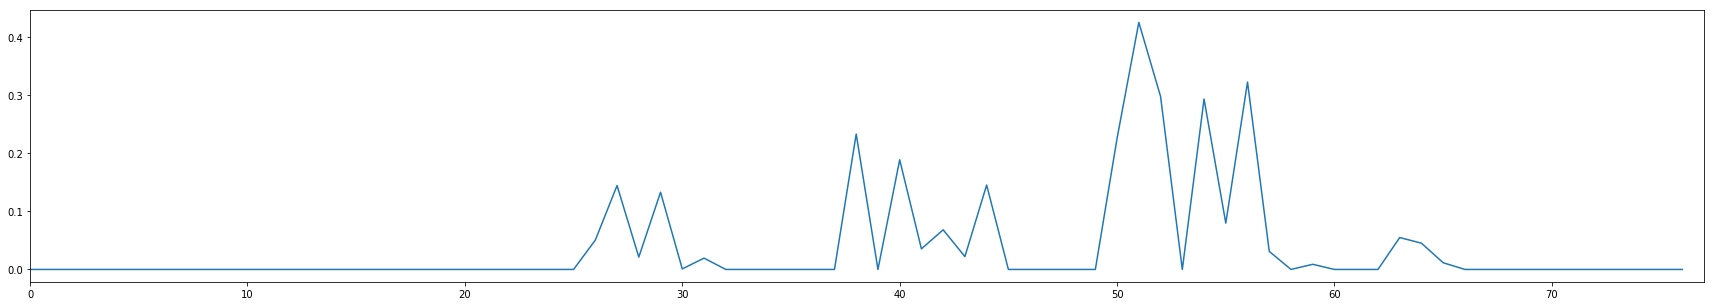

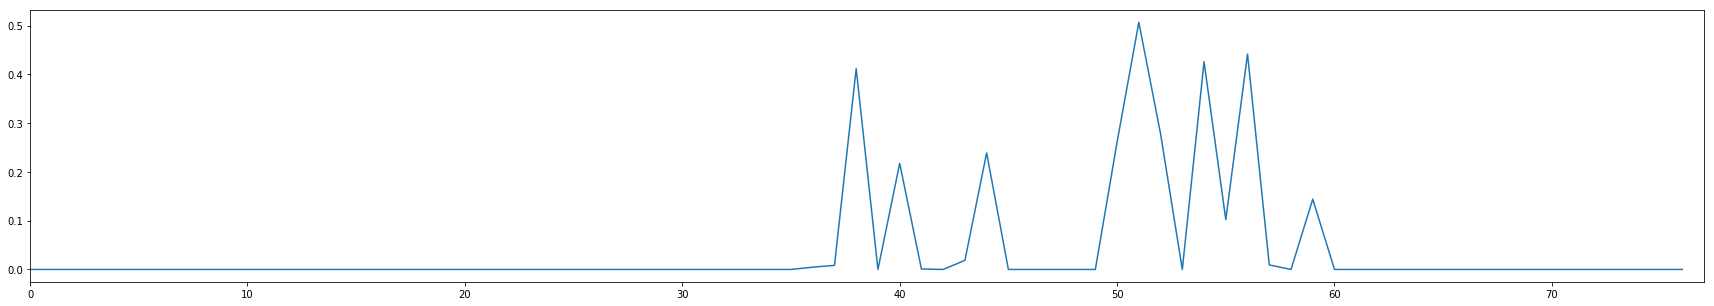

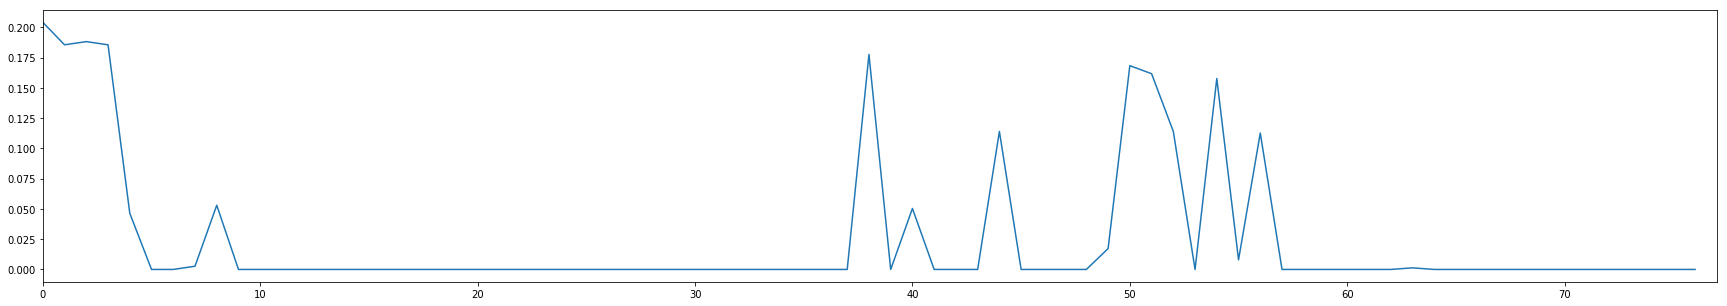

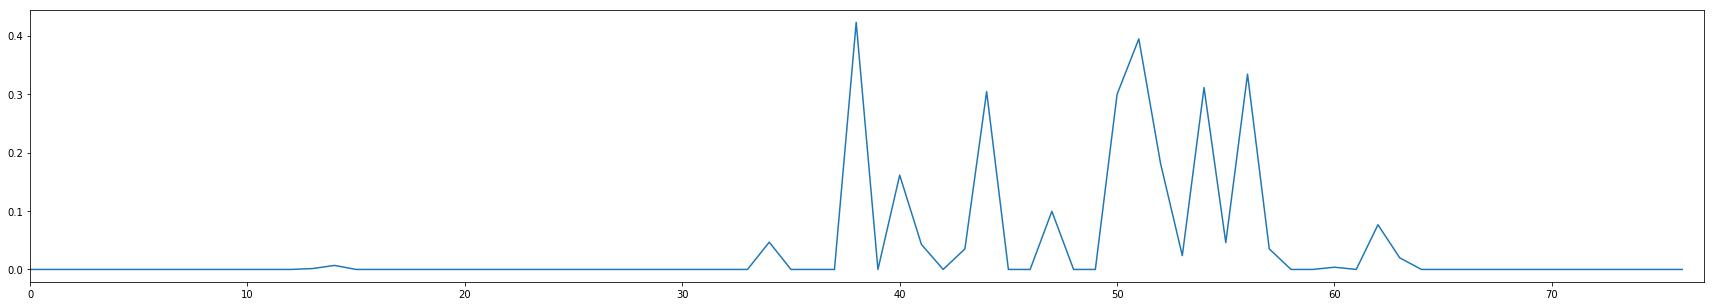

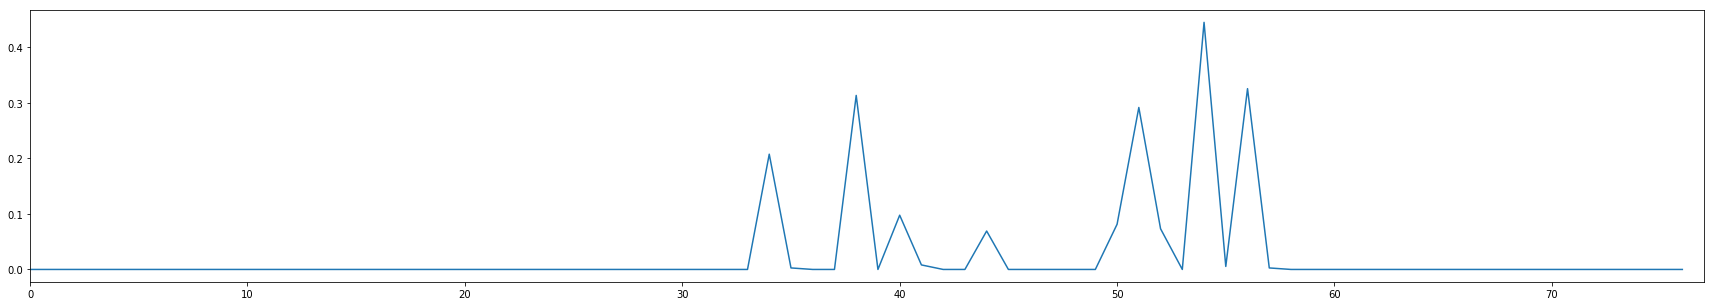

In [415]:
count = 0
for rw in loc_wise_ft:
    plt.figure(figsize=(30,5))
    plt.xlim(0,len(rw[:-1]))
    plt.plot(rw[:-1])
    
    #plt.savefig(test_root+ "pics/" + "loc:" + str(count) +".png")
    plt.show()
    count = count + 1

In [428]:
feature_list.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.0,0.333333,0.666667,1.000000,1.333333,1.666667,2.000000,2.333333,2.666667,3.000000,...,23.666667,24.000000,24.333333,24.666667,25.000000,25.333333,25.666667,26.000000,26.333333,26.666667
std,0.0,0.577350,1.154701,1.732051,2.309401,2.886751,3.464102,4.041452,4.618802,5.196152,...,37.581024,38.157568,38.734137,39.310728,39.887341,40.463976,41.040630,41.617304,42.193996,42.770706
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,0.0,0.500000,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,4.000000,4.500000,...,35.500000,36.000000,36.500000,37.000000,37.500000,38.000000,38.500000,39.000000,39.500000,40.000000
max,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,67.000000,68.000000,69.000000,70.000000,71.000000,72.000000,73.000000,74.000000,75.000000,76.000000


In [429]:
data_covariance = feature_list.cov()

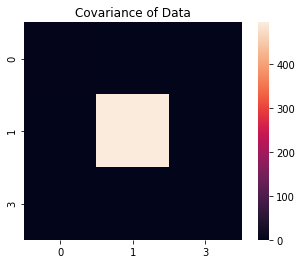

In [430]:
import seaborn as sns
sns.heatmap(data_covariance, square=True)
plt.title("Covariance of Data")
plt.show()

In [416]:
#feature_list.to_csv(test_root + "features", header=False, index=False)

feat = []
for location in range(0,len(place)):
    for element in range(0,len(place[location])):
        if place[location][element] == 1:
            for row in range(0,len(disc_mot)):
                if disc_mot[row][element] == 1:
                    count = count+1
            feat.append([location,row,count])
            #[location,row,count]